# TensorFlow 2.0 - Basic classification
https://www.tensorflow.org/alpha/tutorials/keras/basic_classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

2.0.0-alpha0


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

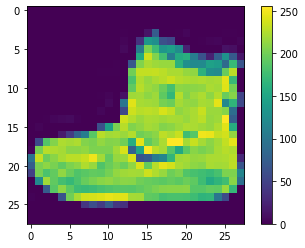

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

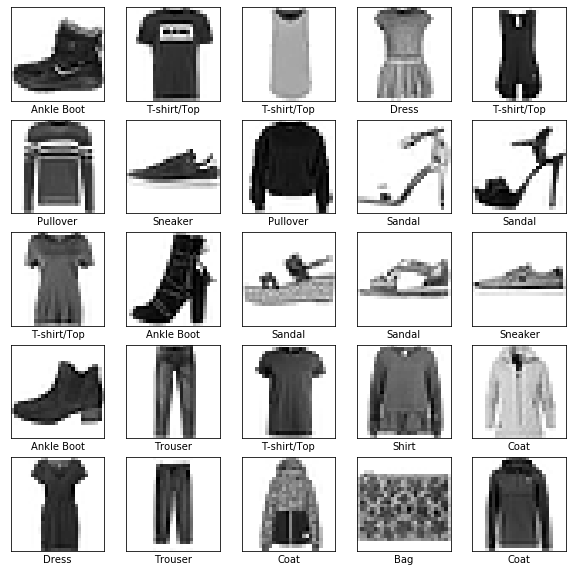

In [23]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4975 - accuracy: 0.8253
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3745 - accuracy: 0.8650
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3355 - accuracy: 0.8765
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3144 - accuracy: 0.8846
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2938 - accuracy: 0.8916


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.3768 - accuracy: 0.8618


In [28]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8618


In [29]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([8.2458509e-06, 1.1897354e-05, 4.0477584e-08, 8.1867109e-09,
       2.7913319e-07, 2.1588327e-03, 2.6879405e-07, 3.3679735e-03,
       1.5141946e-05, 9.9443722e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predict_label = np.argmax(predictions_array)
    if predict_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predict_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

In [37]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predict_label = np.argmax(predictions_array)
    
    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')

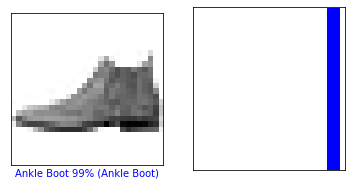

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

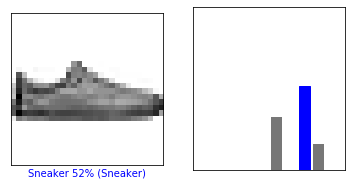

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red

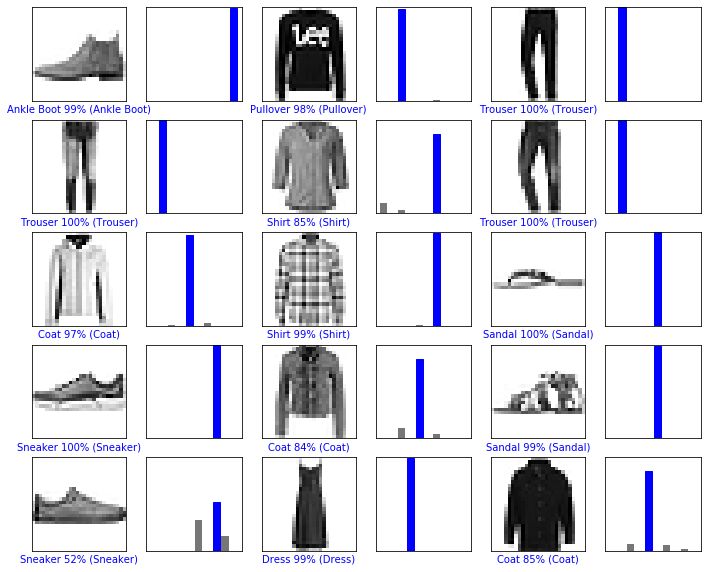

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
# Grab an image from the test dataset

In [44]:
img = test_images[0]

In [45]:
print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img, 0))

In [47]:
print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = model.predict(img)

In [49]:
print(predictions_single)

[[8.2458528e-06 1.1897342e-05 4.0477513e-08 8.1867118e-09 2.7913268e-07
  2.1588330e-03 2.6879380e-07 3.3679707e-03 1.5141962e-05 9.9443734e-01]]


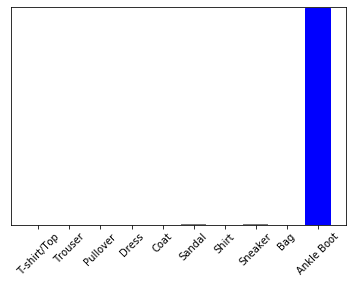

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [51]:
np.argmax(predictions_single[0])

9

# FIM